In [1]:
import numpy as np
import matplotlib.pyplot as plt

from loguru import logger

from plot import ecdf
from geogiant.common.files_utils import load_json, load_pickle
from geogiant.common.settings import PathSettings

path_settings = PathSettings()

targets = load_json(path_settings.OLD_TARGETS)
vps = load_json(path_settings.OLD_VPS)

In [2]:
ref_error_target = load_pickle(
    path_settings.RESULTS_PATH / "ref_target_geoloc_error.pickle"
)
ref_latency_target = load_pickle(
    path_settings.RESULTS_PATH / "ref_target_min_latencies.pickle"
)

ecs_dns_eval = load_pickle(path_settings.RESULTS_PATH / "ecs_dns_eval.pickle")

# Distance evaluation

2024-02-09 14:44:47.075 | INFO     | __main__:<module>:16 - probing budget = 1, geolocated ip addr = 553
2024-02-09 14:44:47.078 | INFO     | __main__:<module>:16 - probing budget = 10, geolocated ip addr = 715
2024-02-09 14:44:47.081 | INFO     | __main__:<module>:16 - probing budget = 50, geolocated ip addr = 733
2024-02-09 14:44:47.084 | INFO     | __main__:<module>:16 - probing budget = 100, geolocated ip addr = 742


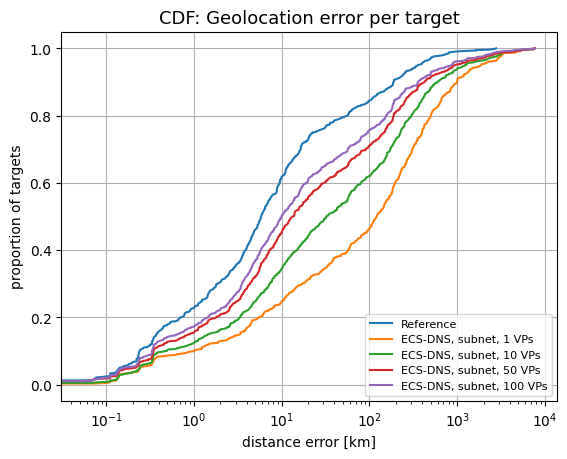

In [9]:
fig, ax1 = plt.subplots(1, 1)

# # plot results for reference vp selection
x, y = ecdf([e for e in ref_error_target.values()])
ax1.plot(x, y, label="Reference")

# # plot results for reference vp selection
for granularity in ecs_dns_eval:
    if granularity == "bgp_prefix":
        continue
    for probing_budget, target_results in ecs_dns_eval[granularity].items():
        if probing_budget in [1, 10, 50, 100]:
            x, y = ecdf([l["elected_d_error"] for l in target_results.values()])
            ax1.plot(x, y, label=f"ECS-DNS, {granularity}, {probing_budget} VPs")

            logger.info(
                f"probing budget = {probing_budget}, geolocated ip addr = {len(target_results.values())}"
            )

plt.xlabel("distance error [km]")
plt.ylabel("proportion of targets")
plt.legend(loc="lower right", fontsize=8)
plt.xscale("log")
plt.grid()
plt.title(
    f"CDF: Geolocation error per target",
    fontsize=13,
)
plt.savefig(path_settings.FIGURE_PATH / "geolocation_error_ecs_dns.pdf")
plt.show()

# Latency evaluation

2024-02-09 14:44:14.070 | INFO     | __main__:<module>:19 - probing_budget = 1, median latency = 9.880621
2024-02-09 14:44:14.074 | INFO     | __main__:<module>:19 - probing_budget = 10, median latency = 2.827347
2024-02-09 14:44:14.077 | INFO     | __main__:<module>:19 - probing_budget = 50, median latency = 1.37544
2024-02-09 14:44:14.080 | INFO     | __main__:<module>:19 - probing_budget = 100, median latency = 1.148024
2024-02-09 14:44:14.082 | INFO     | __main__:<module>:19 - probing_budget = 200, median latency = 0.9480115
2024-02-09 14:44:14.085 | INFO     | __main__:<module>:19 - probing_budget = 1, median latency = 11.641941
2024-02-09 14:44:14.087 | INFO     | __main__:<module>:19 - probing_budget = 10, median latency = 3.169751


2024-02-09 14:44:14.090 | INFO     | __main__:<module>:19 - probing_budget = 50, median latency = 1.41501
2024-02-09 14:44:14.093 | INFO     | __main__:<module>:19 - probing_budget = 100, median latency = 1.199276
2024-02-09 14:44:14.095 | INFO     | __main__:<module>:19 - probing_budget = 200, median latency = 1.0077855


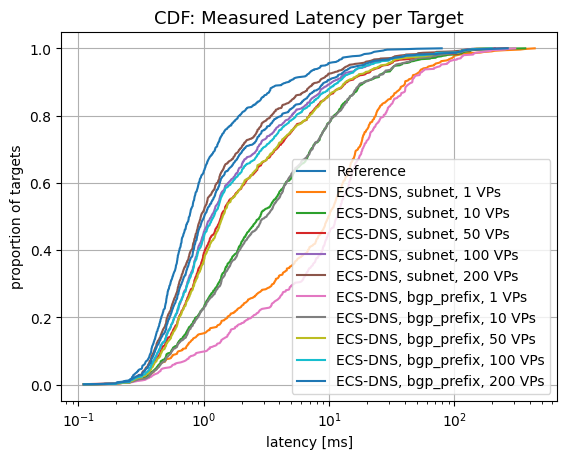

In [7]:
fig, ax1 = plt.subplots(1, 1)

# # plot results for reference vp selection
x, y = ecdf([e for e in ref_latency_target.values()])
ax1.plot(x, y, label="Reference")

# # plot results for reference vp selection
for granularity in ecs_dns_eval:
    if granularity == "bgp_prefix":
        continue
    for probing_budget, target_results in ecs_dns_eval[granularity].items():
        if probing_budget in [1, 10, 50, 100, 200]:
            x, y = ecdf([l["elected_min_rtt"] for l in target_results.values()])
            median_latency = np.median(
                [l["elected_min_rtt"] for l in target_results.values()]
            )

            ax1.plot(x, y, label=f"ECS-DNS, {granularity}, {probing_budget} VPs")
            logger.info(
                f"probing_budget = {probing_budget}, median latency = {median_latency}"
            )

plt.xlabel("latency [ms]")
plt.ylabel("proportion of targets")
plt.legend(loc="lower right", fontsize=10)
plt.xscale("log")
plt.grid()
plt.title(
    f"CDF: Measured Latency per Target",
    fontsize=13,
)
plt.savefig(path_settings.FIGURE_PATH / "latency_ecs_dns.pdf")
plt.show()

# Best VP index

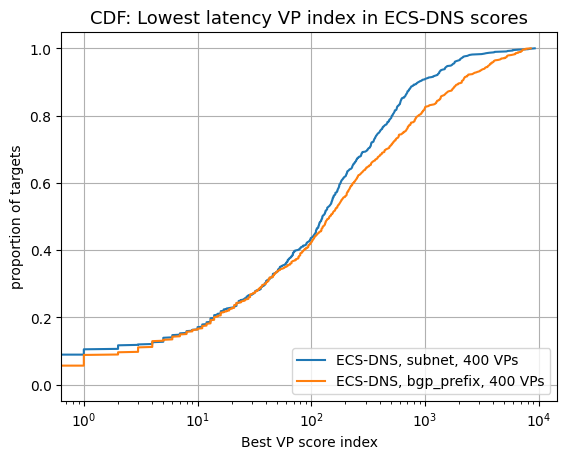

In [5]:
fig, ax1 = plt.subplots(1, 1)

# # plot results for reference vp selection
for granularity in ecs_dns_eval:
    for probing_budget, target_results in ecs_dns_eval[granularity].items():

        if probing_budget in [400]:
            x, y = ecdf([l["best_vp_index"] for l in target_results.values()])
            ax1.plot(x, y, label=f"ECS-DNS, {granularity}, {probing_budget} VPs")

plt.xlabel("Best VP score index")
plt.ylabel("proportion of targets")
plt.legend(loc="lower right", fontsize=10)
plt.xscale("log")
plt.grid()
plt.title(
    f"CDF: Lowest latency VP index in ECS-DNS scores",
    fontsize=13,
)
plt.savefig(path_settings.FIGURE_PATH / "best_vp_index.pdf")
plt.show()

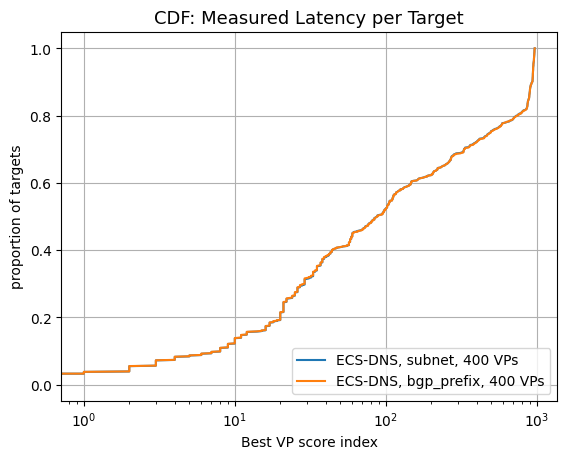

In [6]:
fig, ax1 = plt.subplots(1, 1)

# # plot results for reference vp selection
for granularity in ecs_dns_eval:
    for probing_budget, target_results in ecs_dns_eval[granularity].items():

        if probing_budget in [400]:
            x, y = ecdf([l["threshold_vp_index"] for l in target_results.values()])
            ax1.plot(x, y, label=f"ECS-DNS, {granularity}, {probing_budget} VPs")

plt.xlabel("Best VP score index")
plt.ylabel("proportion of targets")
plt.legend(loc="lower right", fontsize=10)
plt.xscale("log")
plt.grid()
plt.title(
    f"CDF: Measured Latency per Target",
    fontsize=13,
)
plt.savefig(path_settings.FIGURE_PATH / "best_vp_index.pdf")
plt.show()